In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

from functools import reduce
from statistics import median, mean, stdev

# Problem 3: Dataset Analysis

## 3.1: Basic Counts

### Part A

In [2]:
filename = "AP_train.txt"

In [3]:
# Declare a class to hold paper information
class Paper(object):
    def __init__(self):
        self.title = ""
        self.authors = []
        self.year = 0
        self.venue = ""
        self.references = []

In [4]:
# Read the file
papers = []
with open(filename) as input_file:
    current_paper = Paper()
    
    for line in input_file:
        if line.strip() == "":  # New paper
            papers.append(current_paper)
            current_paper = Paper()
        # elif line[0:2] == "#i":  # Index line
            # Can't actually do this since there are skipped indices
            # assert len(papers) + 1 == int(line[7:]), "Index mismatch" 
        elif line[0:2] == "#*":  # Title
            current_paper.title = line[3:].strip()
        elif line[0:2] == "#@" and line[3:].strip() != "":  # Authors
            current_paper.authors = list(map(lambda x: x.strip(), line[3:].split(";")))
        elif line[0:2] == "#t" and line[3:].strip() != "":  # Year
            current_paper.year = int(line[3:].strip())
        elif line[0:2] == "#c":  # Venue
            current_paper.venue = line[3:].strip()
        elif line[0:2] == "#%":  # Reference
            current_paper.references.append(int(line[3:].strip()))
    assert current_paper.title == "", "Skipped last paper"

In [5]:
# Compute the number of distinct authors, publication venues, 
# publications, and citations/references.
authors = set()
venues = set()
citations = set()
for i in range(len(papers)):
    paper = papers[i]
    authors.update(paper.authors)
    venues.add(paper.venue)
    citations.update(map(lambda cit: (i + 1, cit), paper.references))

print("There are %s authors." % (len(authors)))
print("There are %s venues." % (len(venues)))
print("There are %s publications." % (len(papers)))
print("There are %s references." % (len(citations)))

There are 1478734 authors.
There are 255686 venues.
There are 1976815 publications.
There are 7250326 references.


### Part B

Without additional cleaning, these numbers are unlikely to be accurate. For example, venues, such as *Principles and Practice of Knowledge Disovery in Databases* have several listed names. The same is true for other fields where papers could potentially be listed twice and authors' names.

## 3.2: Publications, Authors, Venues

In [6]:
# Construct dictionarys mapping authors/venues to their publications
author_to_pubs = {}
venue_to_pubs = {}

for i in range(len(papers)):
    paper = papers[i]
    
    # Update author_to_pubs
    for author in paper.authors:
        if author != "":
            if author in author_to_pubs:
                author_to_pubs[author].add(i + 1)
            else:
                author_to_pubs[author] = set([i + 1])
    
    # Update venue_to_pubs
    if paper.venue != "":
        if paper.venue in venue_to_pubs:
            venue_to_pubs[paper.venue].add(i + 1)
        else:
            venue_to_pubs[paper.venue] = set([i + 1])

### Part A

In [7]:
# Print the list of publications ids per author
author_to_pubs

{'Marjorie Richardson': {1,
  293028,
  293120,
  293171,
  293207,
  293290,
  293427,
  293435,
  293513,
  293519,
  293533,
  293572,
  293630,
  293667,
  293673,
  293688,
  293782,
  293793,
  293809,
  293836,
  293837,
  293839,
  293856,
  293874,
  293901,
  293982,
  293990,
  294120,
  294167,
  294178,
  294208,
  311388,
  311477,
  311488,
  311506,
  311541,
  311556,
  311615,
  311620,
  311644,
  311649,
  312034,
  312163,
  312203,
  312276,
  312304,
  312320,
  449903},
 'Virgil D. Gligor': {3,
  255,
  18524,
  18527,
  69535,
  156657,
  315575,
  414366,
  443150,
  456688,
  463856,
  507224,
  526670,
  528603,
  528610,
  528619,
  528756,
  528771,
  528780,
  528791,
  528924,
  528933,
  548895,
  599078,
  616928,
  664473,
  664478,
  664495,
  697913,
  697915,
  707143,
  712808,
  716957,
  786454,
  822460,
  832607,
  840734,
  852082,
  863440,
  904234,
  1014553,
  1045440,
  1120674,
  1134404,
  1281741,
  1350851,
  1460184,
  1527421,
  15

<IPython.core.display.Javascript object>


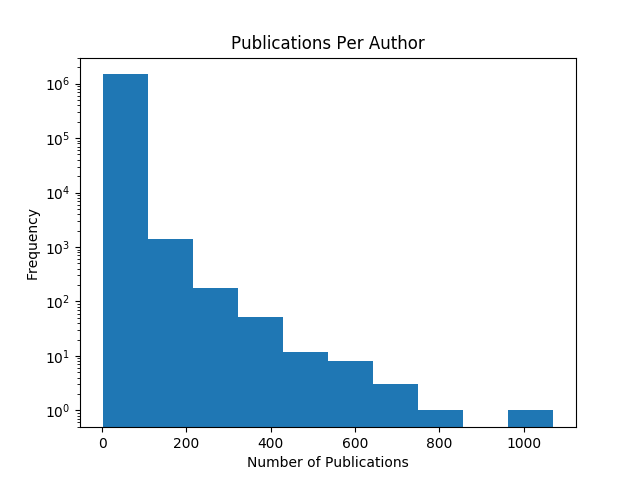

In [34]:
# Plot number of publications per author
pubs_per_author = [len(v) for v in author_to_pubs.values()]
plt.figure(1)
plt.hist(pubs_per_author)
plt.yscale('log', nonposy='clip')
plt.title("Publications Per Author")
plt.xlabel("Number of Publications")
plt.ylabel("Frequency")

### Part B

In [9]:
# Calaculate the mean number of publications per author
mean_pubs_per_author = mean(pubs_per_author)
print("Mean: %s" % mean_pubs_per_author)

Mean: 3.2907867748944537


In [10]:
# Calculate the standard deviation of the number of publications per author
stdev_pubs_per_author = stdev(pubs_per_author)
print("Standard Deviation: %s" % stdev_pubs_per_author)

Standard Deviation: 8.869338555159802


In [11]:
# Calculate the Q1 value of the number of publications per author (based on definition of IQR below)
sorted_pubs_per_author = sorted(pubs_per_author)
q1_pubs_per_author = median(sorted_pubs_per_author[:int(len(sorted_pubs_per_author) / 2) + 1])
print("Q1: %s" % q1_pubs_per_author)

Q1: 1


In [12]:
# Calculate the Q2 value of the number of publications per author
q2_pubs_per_author = median(sorted_pubs_per_author)
print("Q2: %s" % q2_pubs_per_author)

Q2: 1


In [13]:
# Calculate the Q3 value of the number of publications per author (based on definition of IQR below)
q3_pubs_per_author = median(sorted_pubs_per_author[int(len(sorted_pubs_per_author) / 2):])
print("Q3: %s" % q3_pubs_per_author)

Q3: 2


In this case, the median is low in comparison to the mean, which makes sense given the high standard deviation. The histogram plotted above shows that a vast majority of the authors made very few publications, with some authors publishing many publications. This trend is reaffirmed because the Q1 and Q2 (median) values are the same and very close to the Q3 value. 

### Part C

<IPython.core.display.Javascript object>


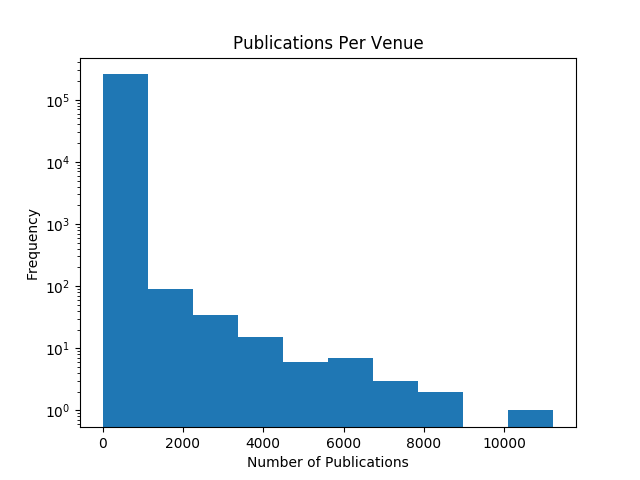

In [35]:
# Find and plot the number of publications per venue
pubs_per_venue = [len(v) for v in venue_to_pubs.values()]
plt.figure(2)
plt.hist(pubs_per_venue)
plt.yscale('log', nonposy='clip')
plt.title("Publications Per Venue")
plt.xlabel("Number of Publications")
plt.ylabel("Frequency")

In [15]:
# Calaculate the mean number of publications per venue
mean_pubs_per_venue = mean(pubs_per_venue)
print("Mean: %s" % mean_pubs_per_venue)

Mean: 7.7309658368695855


In [16]:
# Calculate the standard deviation of the number of publications per venue
stdev_pubs_per_venue = stdev(pubs_per_venue)
print("Standard Deviation: %s" % stdev_pubs_per_venue)

Standard Deviation: 83.38107059526949


In [17]:
# Calculate the Q1 value of the number of publications per venue (based on definition of IQR below)
sorted_pubs_per_venue = sorted(pubs_per_venue)
q1_pubs_per_venue = median(sorted_pubs_per_venue[:int(len(sorted_pubs_per_venue) / 2) + 1])
print("Q1: %s" % q1_pubs_per_venue)

Q1: 1


In [18]:
# Calculate the Q2 value of the number of publications per venue
q2_pubs_per_venue = median(sorted_pubs_per_venue)
print("Q2: %s" % q2_pubs_per_venue)

Q2: 1


In [19]:
# Calculate the Q3 value of the number of publications per venue (based on definition of IQR below)
q3_pubs_per_venue = median(sorted_pubs_per_venue[int(len(sorted_pubs_per_venue) / 2):])
print("Q3: %s" % q3_pubs_per_venue)

Q3: 1


In [20]:
# Find the venue with the largest number of publications in the dataset
high_value = sorted_pubs_per_venue[-1]
max_venues = []
for venue, pubs in venue_to_pubs.items():
    if len(pubs) == high_value:
        max_venues.append(venue)

print("Venue(s) with largest number of publications: %s (%s)" 
      % (", ".join(max_venues), high_value))

Venue(s) with largest number of publications: IEEE Transactions on Information Theory (11227)


## 3.3: References, Citations, Impact

<IPython.core.display.Javascript object>


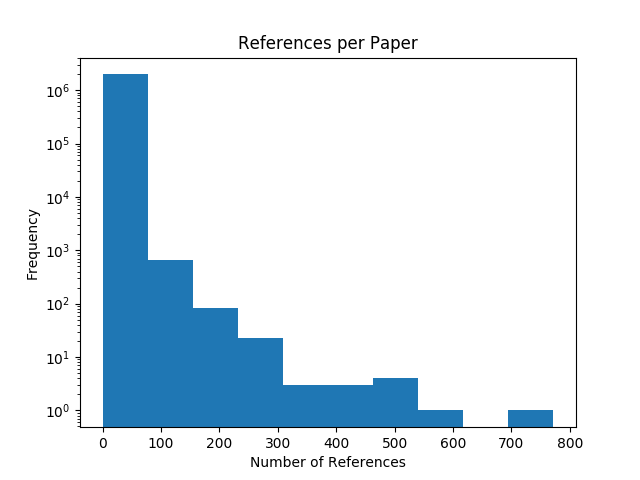

In [36]:
# Count and plot the number of refernces per paper
reference_count = {}

for i in range(len(papers)):
    paper = papers[i]
    reference_count[i + 1] = len(paper.references)

plt.figure(3)
plt.hist(list(reference_count.values()))
plt.yscale('log', nonposy='clip')
plt.title("References per Paper")
plt.xlabel("Number of References")
plt.ylabel("Frequency")

<IPython.core.display.Javascript object>


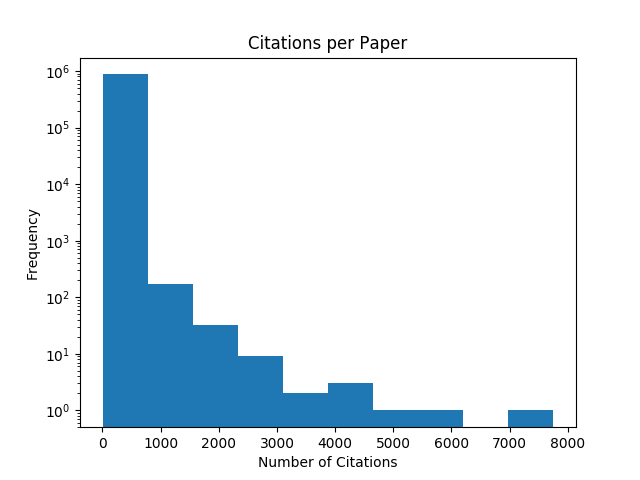

In [37]:
# Count the number of times each paper is cited
citation_count = {}

for paper in papers:
    for ref in paper.references:
        if ref in citation_count:
            citation_count[ref] += 1
        else:
            citation_count[ref] = 1

plt.figure(4)
plt.hist(list(citation_count.values()))
plt.yscale('log', nonposy='clip')
plt.title("Citations per Paper")
plt.xlabel("Number of Citations")
plt.ylabel("Frequency")

In [23]:
# Find a publication with the largest number of references
print("Publication %s had the largest number of references." % 
      max(reference_count.keys(), key=(lambda k: reference_count[k])))

Publication 719352 had the largest number of references.


In [24]:
# Find a publication with the largest number of citations
print("Publication %s had the largest number of citations." % 
      max(citation_count.keys(), key=(lambda k: citation_count[k])))

Publication 408396 had the largest number of citations.


The paper with the largest number of references is a 'Cited References' section of the 'Computer algebra handbook' venue. It makes sense that this would have the greatest number of references, but not that it necessarially belongs in the dataset. The 'Challenge of Microprocessors' article is also the name of the venue, which makes it seem like this value wouldn't necessarially belong in the dataset either and might not be correct with the largest number of citations.

### Part B

<IPython.core.display.Javascript object>


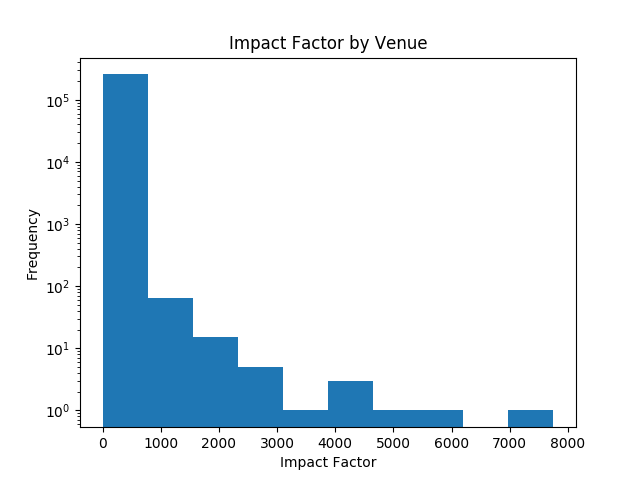

In [38]:
# Calculate and plot the impact factor for each venue
venue_to_citations = {}
venue_to_pub_count = {}
venue_to_impact_factor = {}

for i in range(len(papers)):
    paper = papers[i]
    
    # Update count of publications
    if paper.venue in venue_to_pub_count:
        venue_to_pub_count[paper.venue] += 1
    else:
        venue_to_pub_count[paper.venue] = 1
    
    # Update number of citations
    if paper.venue in venue_to_citations:
        venue_to_citations[paper.venue] += citation_count[i + 1] if i + 1 in citation_count else 0
    else:
        venue_to_citations[paper.venue] = citation_count[i + 1] if i + 1 in citation_count else 0

# Calculate the impact factor
for venue in venue_to_pub_count.keys():
    venue_to_impact_factor[venue] = float(venue_to_citations[venue]) / float(venue_to_pub_count[venue])

# Plot the results
plt.figure(5)
plt.hist(list(venue_to_impact_factor.values()))
plt.yscale('log', nonposy='clip')
plt.title("Impact Factor by Venue")
plt.xlabel("Impact Factor")
plt.ylabel("Frequency")

### Part C

In [26]:
# Find a venue with the highest apparent impact factor
print('Venue "%s" had the highest apparent impact factor.' % 
      max(venue_to_impact_factor.keys(), key=(lambda k: venue_to_impact_factor[k])))

Venue "Challenge of Microprocessors" had the highest apparent impact factor.


I don't necessarially believe this number, because the 'Challenge of Microprocessors' appears to not be a venue in itself. Based on a simple search (and as described in the previous answer), it [appears to be a paper itself](http://ieeexplore.ieee.org/document/5198005/).

### Part D

<IPython.core.display.Javascript object>


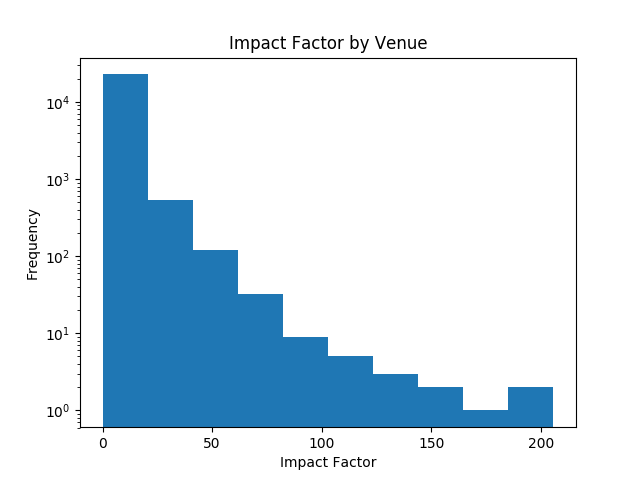

In [39]:
# Find venues with at least 10 publications
venue_to_pub_count_filtered = {venue:pubs for venue,pubs in venue_to_pub_count.items() if pubs >= 10}

# Re-Count the number of times each paper is cited (by a paper in a venue w/ at least 10 pubs)
citation_count_filtered = {}
for paper in papers:
    if paper.venue in venue_to_pub_count_filtered:
        for ref in paper.references:
            if ref in citation_count_filtered:
                citation_count_filtered[ref] += 1
            else:
                citation_count_filtered[ref] = 1

# Re-compute the impact factor for only these venues
venue_to_pub_count_only_filtered = {}
venue_to_citations_filtered = {}
venue_to_impact_factor_filtered = {}

for i in range(len(papers)):
    paper = papers[i]
    if paper.venue in venue_to_pub_count_filtered:
        # Update count of publications
        if paper.venue in venue_to_pub_count_only_filtered:
            venue_to_pub_count_only_filtered[paper.venue] += 1
        else:
            venue_to_pub_count_only_filtered[paper.venue] = 1

        # Update number of citations
        if paper.venue in venue_to_citations_filtered:
            venue_to_citations_filtered[paper.venue] += citation_count_filtered[i + 1] if i + 1 in citation_count_filtered else 0
        else:
            venue_to_citations_filtered[paper.venue] = citation_count_filtered[i + 1] if i + 1 in citation_count_filtered else 0

# Calculate the impact factor
for venue in venue_to_pub_count_filtered.keys():
    citations = float(venue_to_citations_filtered[venue]) if venue in venue_to_citations_filtered else 0.0
    pub_count = float(venue_to_pub_count_only_filtered[venue]) if venue in venue_to_pub_count_only_filtered else 0.0
    venue_to_impact_factor_filtered[venue] = citations / pub_count

# Plot the results
plt.figure(6)
plt.hist(list(venue_to_impact_factor_filtered.values()))
plt.yscale('log', nonposy='clip')
plt.title("Impact Factor by Venue")
plt.xlabel("Impact Factor")
plt.ylabel("Frequency")

The histogram changed to not artifically inflate the impact factors of journals as much and to better reflect the actual impact factor of journals as described [here](http://mdanderson.libanswers.com/faq/26159). Here, only approximately the top 1% of journals have exceptionally high impact factors.

In [28]:
# Find the venue with the highest impact factor
high_impact_venue = max(venue_to_impact_factor_filtered.keys(), 
                        key=(lambda k: venue_to_impact_factor_filtered[k]))
print('Venue "%s" had the highest impact factor (%s) with the following papers:' % 
      (high_impact_venue, venue_to_impact_factor_filtered[high_impact_venue]))

# List the citation counts for all publications from the venue with the highest impact factor
high_venue_citation_counts = []
for i in range(len(papers)):
    paper = papers[i]
    if paper.venue == high_impact_venue:
        count = citation_count_filtered[i + 1] if i + 1 in citation_count_filtered else 0
        high_venue_citation_counts.append(count)
        print("%s => %s" % (paper.title, count))

Venue "Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications" had the highest impact factor (205.69565217391303) with the following papers:
Hash-based IP traceback => 0
On the effectiveness of route-based packet filtering for distributed DoS attack prevention in power-law internets => 165
Reliable group rekeying: a performance analysis => 113
Aging through cascaded caches: performance issues in the distribution of web content => 47
Enabling conferencing applications on the internet using an overlay muilticast architecture => 10
IPNL: A NAT-extended internet architecture => 134
On the impact of policing and rate guarantees in DiffServ networks: a video streaming application perspective => 45
Scalable on-demand media streaming with packet loss recovery => 10
Statistical bandwidth sharing: a study of congestion at flow level => 11
Analysis and design of an adaptive virtual queue (AVQ) algorithm for active queue managemen

In [30]:
# Find the median number of citations
print("Median number of citations: %s" % median(high_venue_citation_counts))

Median number of citations: 42


The impact factor of "Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications" (205.69565217391303) is signifantly higher than the median number of citations. This shows that the impact factor was likely inflated by a number of highly-cited outlier publications.

In [31]:
# Construct a list of publications per year
pubs_per_year = {}
for i in range(len(papers)):
    paper = papers[i]
    if paper.year in pubs_per_year:
        pubs_per_year[paper.year].append(i + 1)
    else:
        pubs_per_year[paper.year] = [i + 1]

<IPython.core.display.Javascript object>


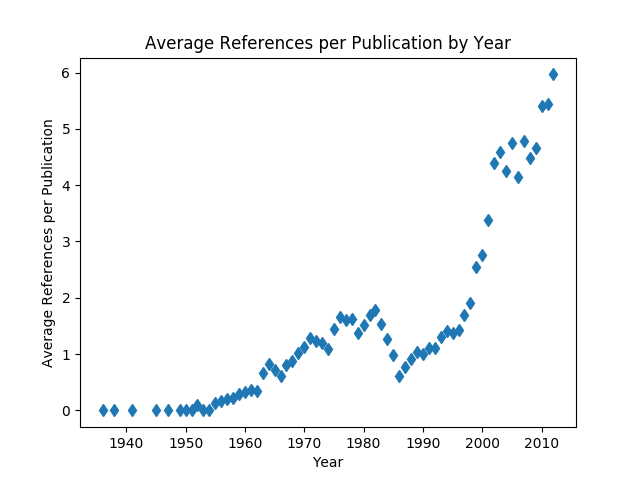

In [32]:
# Plot the average number of references and 
# average number of citations per publication as a function of time
refs_per_year = {}
citations_per_year = {}
for year, pubs in pubs_per_year.items():
    ref_count = sum(map(lambda ref: reference_count[ref] if ref in reference_count else 0, pubs))
    cit_count = sum(map(lambda ref: citation_count[ref] if ref in citation_count else 0, pubs))
    refs_per_year[year] = float(ref_count) / float(len(pubs))
    citations_per_year[year] = float(cit_count) / float(len(pubs))
del refs_per_year[0]
del citations_per_year[0]

plt.figure(7)
plt.plot(list(refs_per_year.keys()), list(refs_per_year.values()), 'd')
plt.title("Average References per Publication by Year")
plt.xlabel("Year")
plt.ylabel("Average References per Publication")

<IPython.core.display.Javascript object>


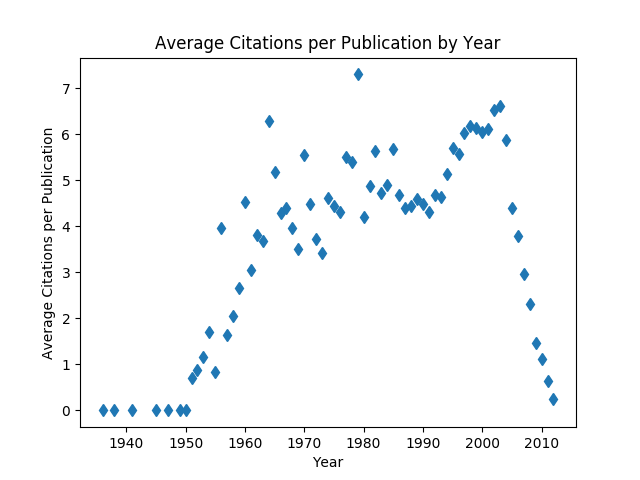

In [33]:
plt.figure(8)
plt.plot(list(citations_per_year.keys()), list(citations_per_year.values()), 'd')
plt.title("Average Citations per Publication by Year")
plt.xlabel("Year")
plt.ylabel("Average Citations per Publication")

The average number of citations per publication by year dropped off around 2005-2010. This is likely because of the time period of the dataset as the newest articles haven't had a chance to be cited by the end of data collection. 

Otherwise, both tends seem to be generally increasing overtime, with references increasing significantly starting around 1998. The average number of citations began increasing significantly around 1955 before leveling off around 1970 and increasing again after 1990.